In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import sklearn
import random

random.seed(12345)

In [2]:
Xtrain = np.loadtxt('Xtrain.csv')
Ytrain = np.loadtxt('Ytrain.csv')
Xtest = np.loadtxt('Xtest.csv')

In [3]:
print('There are', Xtrain.shape[0], 'training examples')
print('There are', Xtest.shape[0], 'test examples')

There are 3000 training examples
There are 3000 test examples


Text(0.5, 1.05, 'Class +1 Example 10')

<Figure size 432x288 with 0 Axes>

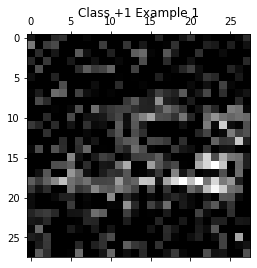

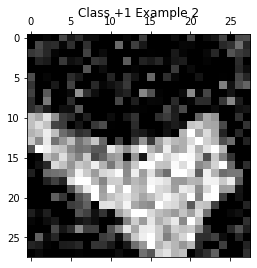

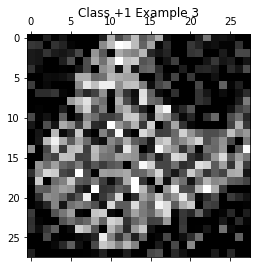

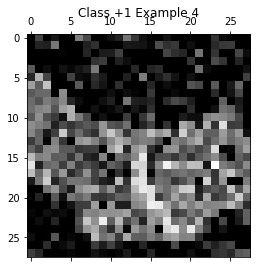

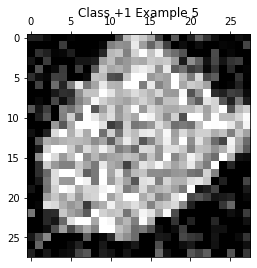

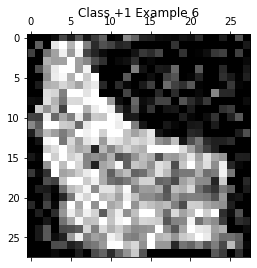

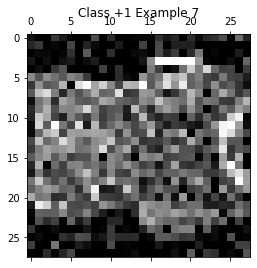

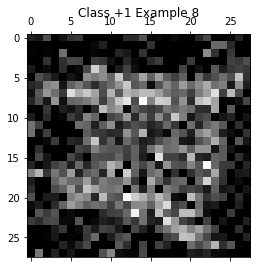

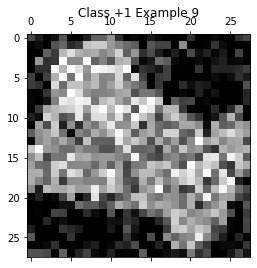

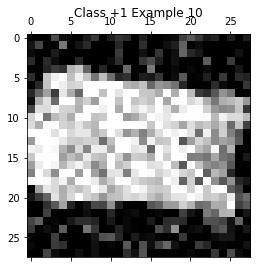

In [4]:
idx_class_neg1 = ( Ytrain == -1) # index for -1 class
idx_class_pos1 = ( Ytrain == +1) # index for +1 class

Xtrain_pos1 = Xtrain[idx_class_pos1, ] #all +1 class training examples
Xtrain_neg1 = Xtrain[idx_class_neg1, ] #all -1 class training examples
Ytrain_pos1 = Ytrain[idx_class_pos1, ] #all +1 class training labels
Ytrain_neg1 = Ytrain[idx_class_neg1, ] #all -1 class training labels

idx_pos1 = list(range(len(Ytrain_pos1)))
idx_neg1 = list(range(len(Ytrain_neg1)))
random.shuffle(idx_pos1) # Just shuffle the data for positive classes
random.shuffle(idx_neg1) # Just shuffle the data for positive classes
Xtrain_pos1_random, Ytrain_pos1_random = Xtrain_pos1[idx_pos1,:], Ytrain_pos1[idx_pos1] #randomly shuffled positive class
                                                                                        #training examples
Xtrain_neg1_random, Ytrain_neg1_random = Xtrain_neg1[idx_neg1,:], Ytrain_neg1[idx_neg1] #randomly shuffled negative class
                                                                                        #training examples
plt.gray();plt.matshow(Xtrain_pos1_random[0].reshape((28, 28)));plt.title('Class +1 Example 1')
plt.gray();plt.matshow(Xtrain_pos1_random[1].reshape((28, 28)));plt.title('Class +1 Example 2') 
plt.gray();plt.matshow(Xtrain_pos1_random[2].reshape((28, 28)));plt.title('Class +1 Example 3') 
plt.gray();plt.matshow(Xtrain_pos1_random[3].reshape((28, 28)));plt.title('Class +1 Example 4') 
plt.gray();plt.matshow(Xtrain_pos1_random[4].reshape((28, 28)));plt.title('Class +1 Example 5')  
plt.gray();plt.matshow(Xtrain_pos1_random[5].reshape((28, 28)));plt.title('Class +1 Example 6') 
plt.gray();plt.matshow(Xtrain_pos1_random[6].reshape((28, 28)));plt.title('Class +1 Example 7') 
plt.gray();plt.matshow(Xtrain_pos1_random[7].reshape((28, 28)));plt.title('Class +1 Example 8')  
plt.gray();plt.matshow(Xtrain_pos1_random[8].reshape((28, 28)));plt.title('Class +1 Example 9') 
plt.gray();plt.matshow(Xtrain_pos1_random[9].reshape((28, 28)));plt.title('Class +1 Example 10') 

Text(0.5, 1.05, 'Class -1 Example 10')

<Figure size 432x288 with 0 Axes>

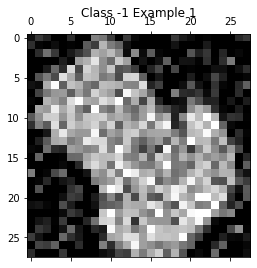

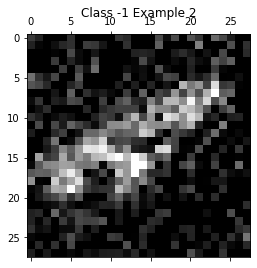

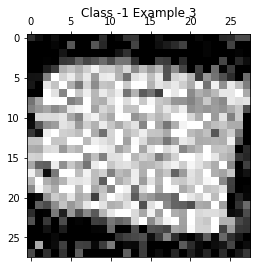

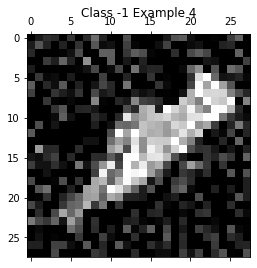

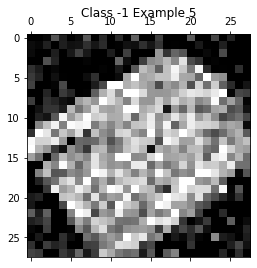

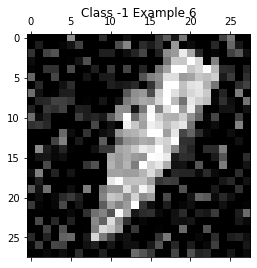

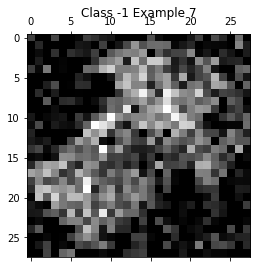

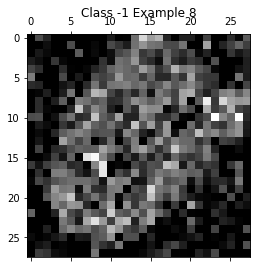

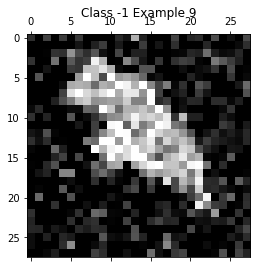

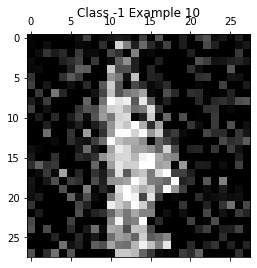

In [5]:
plt.gray();plt.matshow(Xtrain_neg1_random[0].reshape((28, 28)));plt.title('Class -1 Example 1')
plt.gray();plt.matshow(Xtrain_neg1_random[1].reshape((28, 28)));plt.title('Class -1 Example 2') 
plt.gray();plt.matshow(Xtrain_neg1_random[2].reshape((28, 28)));plt.title('Class -1 Example 3') 
plt.gray();plt.matshow(Xtrain_neg1_random[3].reshape((28, 28)));plt.title('Class -1 Example 4') 
plt.gray();plt.matshow(Xtrain_neg1_random[4].reshape((28, 28)));plt.title('Class -1 Example 5')  
plt.gray();plt.matshow(Xtrain_neg1_random[5].reshape((28, 28)));plt.title('Class -1 Example 6') 
plt.gray();plt.matshow(Xtrain_neg1_random[6].reshape((28, 28)));plt.title('Class -1 Example 7') 
plt.gray();plt.matshow(Xtrain_neg1_random[7].reshape((28, 28)));plt.title('Class -1 Example 8')  
plt.gray();plt.matshow(Xtrain_neg1_random[8].reshape((28, 28)));plt.title('Class -1 Example 9') 
plt.gray();plt.matshow(Xtrain_neg1_random[9].reshape((28, 28)));plt.title('Class -1 Example 10')

In [6]:
print('There are', len(Ytrain_pos1), 'positive training examples.')
print('There are', len(Ytrain_neg1), 'negative training examples.')

There are 2118 positive training examples.
There are 882 negative training examples.


Accuracy should not be used due to class imbalance. Between ROC and Precision-Recall.

A random classifier will get 

# Question 2

In [7]:
def accuracy(Ytest,Ypred): #defining accuracy metric
    # to do: calculate accuracy
    # input:
    # Ytest: nx1 vector of labels (true)
    # Ypred: nx1 vector of labels (predicted)
    if len(Ytest) != len(Ypred):
        warnings.warn("Vectors not of same length. Unable to calculate accuracy.")
        return
    else:
        t = (sum(Ypred == Ytest)) / len(Ytest)
    return t #dummy return

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score

#sorted(sklearn.metrics.SCORERS.keys()) ones I can use in cross_val_score

sknn = KNeighborsClassifier(n_neighbors=1)
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

print('For untransformed data with KNN, K=1:')
for f in range(0,5):
    print("Fold %0.0f: Accuracy is %0.3f, ROC is %0.3f, PR is %0.3f" % (f+1, acc[f], roc[f], pr[f]))
    
print('')

print("%0.3f average Accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
print("%0.3f average ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
print("%0.3f average PR with a standard deviation of %0.3f" % (pr.mean(), pr.std()))

For untransformed data with KNN, K=1:
Fold 1: Accuracy is 0.758, ROC is 0.734, PR is 0.824
Fold 2: Accuracy is 0.757, ROC is 0.731, PR is 0.822
Fold 3: Accuracy is 0.758, ROC is 0.723, PR is 0.817
Fold 4: Accuracy is 0.753, ROC is 0.725, PR is 0.817
Fold 5: Accuracy is 0.738, ROC is 0.708, PR is 0.807

0.753 average Accuracy with a standard deviation of 0.008
0.724 average ROC with a standard deviation of 0.009
0.818 average PR with a standard deviation of 0.006


In [9]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

sknn = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=1))
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'f1') #auc pr I think but can change

print('For standardised data with KNN, K=1:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
print("%0.3f F1 with a standard deviation of %0.3f" % (pr.mean(), pr.std()))

For standardised data with KNN, K=1:
0.750 accuracy with a standard deviation of 0.016
0.718 ROC with a standard deviation of 0.019
0.818 F1 with a standard deviation of 0.012


In [10]:
sknn = make_pipeline(preprocessing.MinMaxScaler(), KNeighborsClassifier(n_neighbors=1))
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'f1') #auc pr I think but can change

print('For Min-Max Scaled data with KNN, K=1:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
print("%0.3f PR with a standard deviation of %0.3f" % (pr.mean(), pr.std()))

For Min-Max Scaled data with KNN, K=1:
0.753 accuracy with a standard deviation of 0.009
0.724 ROC with a standard deviation of 0.010
0.820 PR with a standard deviation of 0.007


In [11]:
sknn = make_pipeline(preprocessing.MaxAbsScaler(), KNeighborsClassifier(n_neighbors=1))
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'f1') #auc pr I think but can change

print('For Max Abs Scaled data with KNN, K=1:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
print("%0.3f F1 with a standard deviation of %0.3f" % (pr.mean(), pr.std()))

For Max Abs Scaled data with KNN, K=1:
0.753 accuracy with a standard deviation of 0.009
0.724 ROC with a standard deviation of 0.010
0.820 F1 with a standard deviation of 0.007


Mean transformations make no difference. Finding optimal K:

In [13]:
from sklearn.model_selection import cross_val_score   #redo this with grid-search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score
best_acc = [0,0,0]
best_roc = [0,0,0]
best_pr = [0,0,0]
#sorted(sklearn.metrics.SCORERS.keys()) ones I can use in cross_val_score
for k in range(1, 201):
    sknn = KNeighborsClassifier(n_neighbors=k)
    skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
    acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
    roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
    pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'f1') #auc pr I think but can change
    
    if best_acc[0] < acc.mean():
        best_acc[0] = acc.mean()
        best_acc[1] = acc.std()
        best_acc[2] = k
        
    if best_roc[0] < roc.mean():
        best_roc[0] = roc.mean()
        best_roc[1] = roc.std()
        best_roc[2] = k
        
    if best_pr[0] < pr.mean():
        best_pr[0] = pr.mean()
        best_pr[1] = pr.std()
        best_pr[2] = k

#     print('For untransformed data with KNN, K=',k)
#     print("%0.3f accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
#     print("%0.3f ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
#     print("%0.3f Precision-Recall with a standard deviation of %0.3f" % (pr.mean(), pr.std()))
#     print('')
    
print('Best Accuracy is %0.3f for K = %0.0f' % (best_acc[0], best_acc[2]) )
print('Best ROC is %0.3f for K = %0.0f' % (best_roc[0], best_roc[2]) )
print('Best F1 is %0.3f for K = %0.0f' % (best_pr[0], best_pr[2]) )

Best Accuracy is 0.762 for K = 9
Best ROC is 0.789 for K = 5
Best F1 is 0.843 for K = 17


# Question 3

In [14]:
sknn = KNeighborsClassifier(n_neighbors=best_pr[2])
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc_sknn = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc_sknn = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_sknn = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'f1') #auc pr I think but can change

Perceptron

In [15]:
from sklearn.linear_model import Perceptron

clf_perceptron = Perceptron()
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc_perceptron = cross_val_score(clf_perceptron, Xtrain, Ytrain, cv=skf)
roc_perceptron = cross_val_score(clf_perceptron, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_perceptron = cross_val_score(clf_perceptron, Xtrain, Ytrain, cv=skf, scoring = 'f1') 

print('For Perceptron:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc_perceptron.mean(), acc_perceptron.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc_perceptron.mean(), roc_perceptron.std()))
print("%0.3f PR with a standard deviation of %0.3f" % (pr_perceptron.mean(), pr_perceptron.std()))

For Perceptron:
0.616 accuracy with a standard deviation of 0.072
0.566 ROC with a standard deviation of 0.011
0.716 PR with a standard deviation of 0.104


Naïve Bayes Classifier

In [16]:
from sklearn.naive_bayes import BernoulliNB

clf_nb = BernoulliNB()
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc_nb = cross_val_score(clf_nb, Xtrain, Ytrain, cv=skf)
roc_nb = cross_val_score(clf_nb, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_nb = cross_val_score(clf_nb, Xtrain, Ytrain, cv=skf, scoring = 'f1') 

print('For Naive Bayes Classifier:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc_nb.mean(), acc_nb.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc_nb.mean(), roc_nb.std()))
print("%0.3f PR with a standard deviation of %0.3f" % (pr_nb.mean(), pr_nb.std()))

For Naive Bayes Classifier:
0.557 accuracy with a standard deviation of 0.015
0.582 ROC with a standard deviation of 0.019
0.639 PR with a standard deviation of 0.014


 Logistic regression

In [ ]:
# from sklearn.linear_model import LogisticRegression

# clf_lr = LogisticRegression()
# skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
# acc_lr = cross_val_score(clf_lr, Xtrain, Ytrain, cv=skf)
# roc_lr = cross_val_score(clf_lr, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
# pr_lr = cross_val_score(clf_lr, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') 

# print('For Naive Bayes Classifier:')
# print("%0.3f accuracy with a standard deviation of %0.3f" % (acc_lr.mean(), acc_lr.std()))
# print("%0.3f ROC with a standard deviation of %0.3f" % (roc_lr.mean(), roc_lr.std()))
# print("%0.3f PR with a standard deviation of %0.3f" % (pr_lr.mean(), pr_lr.std()))

Linear SVM

In [17]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#sknn =
scaler = preprocessing.StandardScaler()
lin_svc = LinearSVC()
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
pipe =  Pipeline(steps=[("scaler", scaler), ('lin_svc', lin_svc)])


param_grid = [
    {'lin_svc__C': [1, 10, 100,1000], 'lin_svc__class_weight' : ['balanced', None]}
]

search_lin_svc = GridSearchCV(pipe, param_grid, scoring='f1', cv=skf, refit=True)
search_lin_svc.fit(Xtrain, Ytrain)

search_lin_svc.best_params_



C:\Users\lewis\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lewis\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lewis\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lewis\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lewis\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

{'lin_svc__C': 1, 'lin_svc__class_weight': None}

In [18]:
lin_svc_final = make_pipeline(preprocessing.StandardScaler(), LinearSVC(C= 1, class_weight = None))
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc_lin_svc = cross_val_score(lin_svc_final, Xtrain, Ytrain, cv=skf)
roc_lin_svc = cross_val_score(lin_svc_final, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_lin_svc = cross_val_score(lin_svc_final, Xtrain, Ytrain, cv=skf, scoring = 'f1') 

C:\Users\lewis\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lewis\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lewis\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lewis\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\lewis\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Kernelized SVM

In [19]:
from sklearn.svm import SVC

scaler = preprocessing.StandardScaler()
svc = SVC(cache_size = 12000)
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
pipe =  Pipeline(steps=[("scaler", scaler), ('svc', svc)])
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

param_grid = [
    {'svc__C': [1, 10, 100, 1000], 'svc__gamma': [0.01, 0.001, 0.0001], 'svc__kernel': ['rbf', 'sigmoid', 'poly'],'svc__class_weight' : ['balanced', None]},
]

search_svc = GridSearchCV(pipe, param_grid, scoring='f1', cv=skf, refit=True)
search_svc.fit(Xtrain, Ytrain)
search_svc.best_params_


{'svc__C': 10,
 'svc__class_weight': None,
 'svc__gamma': 0.001,
 'svc__kernel': 'poly'}

In [ ]:
# 10, None, 0.001, poly

In [ ]:
svc_final = make_pipeline(preprocessing.StandardScaler(), SVC(C = 10, class_weight = None, gamma = 0.001, kernal = 'poly'))
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc_svc = cross_val_score(svc_final, Xtrain, Ytrain, cv=skf)
roc_svc = cross_val_score(svc_final, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_svc = cross_val_score(svc_final, Xtrain, Ytrain, cv=skf, scoring = 'f1') 

In [ ]:
import tabulate

In [ ]:
table = [
    ['Model', 'Mean Accuracy', 'Accuracy Std', 'Mean ROC', 'ROC Std', 'Mean PR', 'PR Std'],
    ['KNN', round(acc_sknn.mean(),2), round(acc_sknn.std(),2), round(roc_knn.mean(),2), round(pr_sknn.mean(),2), round(pr_sknn.std(),2)],
    ['Naive Bayes', round(acc_nb.mean(),2), round(acc_nb.std(),2), round(roc_nb.mean(),2), round(roc_nb.std(),2), round(pr_nb.mean(),2), round(pr_nb.std(),2)],
    ['Perceptron', round(acc_perceptron.mean(), 2), round(acc_perceptron.std(), 2), round(roc_perceptron.mean(), 2), round(roc_perceptron.std(),2) round(pr_perceptron.mean(),2), round(pr_perceptron.std(), 2)],
    ['Linear SVM', round(acc_lin_svc.mean(), 2), round(acc_lin_svc.std(), 2), round(roc_lin_svc.mean(), 2), round(roc_lin_svc.std(), 2), round(pr_lin_svc.mean(), 2), round(pr_lin_svc.std(),2)],
    ['Kernalised SVM', round(acc_svc.mean(), 2), round(acc_svc.std(), 2), round(roc_svc.mean(), 2), round(roc_svc.std(), 2), round(pr_svc.mean(), 2), round(pr_svc.std(), 2)],
        ]
print(tabulate(table, headers='firstrow'))

# Question 4

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

#first standardise the data 

Xtrain_std_scale = preprocessing.StandardScaler().fit_transform(Xtrain)
#     Xtrain_cv_std_scale = std_scale.transform(Xtrain_cv)
Xtrain_PCA = pca.fit_transform(Xtrain_std_scale)


plt.scatter(Xtrain_PCA[Ytrain==1,0],Xtrain_PCA[Ytrain==1,1],marker = '^', c = 'y', s = 30, label = 'Class 1')
plt.scatter(Xtrain_PCA[Ytrain==-1,0],Xtrain_PCA[Ytrain==-1,1],marker = 'v',c = 'c', s = 30, label = 'Class -1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')        
plt.legend(loc = 'upper left')
print('The data dimensions are',Xtrain_PCA.shape, Ytrain.shape)

Clearly no linear seperability when the number of dimensions is reduced to 2

In [ ]:
sum(pca.explained_variance_ratio_) # ~22% of variance explained by first 2 principal components

In [ ]:
#scree plot of 20 Principal components
pca = PCA(n_components=Xtrain.shape[1])

#first standardise the data 

Xtrain_std_scale = preprocessing.StandardScaler().fit_transform(Xtrain)
Xtrain_PCA = pca.fit_transform(Xtrain_std_scale)


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
out_sum = 0
c = 0

while out_sum < 0.95:
    c += 1
    pca = PCA(n_components=c)
    Xtrain_PCA = pca.fit_transform(Xtrain_std_scale)
    out_sum = np.sum(pca.explained_variance_ratio_)  


print('%0.0f components results in %0.2f of explained variance' % (c, out_sum))
    

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 534)
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
svc = SVC(cache_size = 12000)

pipe =  Pipeline(steps=[("scaler", scaler), ('pca', pca), ('svc', svc)])
#C = 1.0, class_weight = 'balanced'

param_grid = [
    {'svc__C': [1, 10, 100], 'svc__kernel': ['linear' ],'svc__class_weight' : ['balanced', None]},
    {'svc__C': [1, 10, 100], 'svc__gamma': [0.01, 0.001, 0.0001], 'svc__kernel': ['rbf', 'sigmoid', 'poly'],'svc__class_weight' : ['balanced', None]},
]


search_svc_pca = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=skf, refit=True)
search_svc_pca.fit(Xtrain, Ytrain)
search_svc_pca.best_params_


In [ ]:
svc_pca_final = make_pipeline(preprocessing.StandardScaler(), PCA(n_components = 534), SVC())
acc_lin_svc_pca_final = cross_val_score(svc_pca_final, Xtrain, Ytrain, cv=skf)
roc_lin_svc_pca_final = cross_val_score(svc_pca_final, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr_lin_svc_pca_final = cross_val_score(svc_pca_final, Xtrain, Ytrain, cv=skf, scoring = 'f1') #auc pr I think but can change